In [1]:
from astropy.io import fits
from astropy.table import Table
import re
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
%matplotlib inline
#sns.set()

In [2]:
tile_LIST = ("tile-300000.fits", "tile-300001.fits", "tile-300002.fits", "tile-300003.fits", "tile-300004.fits",\
            "tile-300005.fits", "tile-300006.fits", "tile-300007.fits", "tile-300008.fits", "tile-300009.fits",\
            "tile-300010.fits", "tile-300011.fits", "tile-300012.fits", "tile-300013.fits", "tile-300014.fits",\
            "tile-300015.fits", "tile-300016.fits", "tile-300017.fits", "tile-300018.fits", "tile-300019.fits",\
            "tile-300020.fits")


In [3]:
fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/Utah_Data/tile-300000.fits")

hdul = fits_image_filename

hdul.info()

data1 = hdul["FIBERASSIGN"].data 

#data2 = hdul["POTENTIAL"].data

Filename: /Users/matt/Desktop/DESI_Research/Intro_to_fits/Utah_Data/tile-300000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  FIBERASSIGN    1 BinTableHDU     88   5000R x 36C   [J, J, I, K, K, K, K, D, D, E, E, 8A, J, E, E, E, 3A, I, J, J, D, J, J, J, J, J, E, E, E, E, E, E, E, K, K, K]   
  2  SKY_MONITOR    1 BinTableHDU     52   20R x 18C   [J, J, I, K, K, K, K, D, D, E, E, 8A, J, E, E, I, J, J]   
  3  TARGETS       1 BinTableHDU     88   39110R x 36C   [J, J, I, K, K, K, K, D, D, E, E, 8A, J, E, E, E, 3A, I, J, J, D, J, J, J, J, J, E, E, E, E, E, E, E, K, K, K]   
  4  POTENTIAL_ASSIGNMENTS    1 BinTableHDU     22   43693R x 3C   [K, J, J]   
  5  FASSIGN       1 BinTableHDU     50   5020R x 17C   [J, K, J, J, E, I, J, 3A, D, D, K, K, K, E, E, E, E]   
  6  FTARGETS      1 BinTableHDU     38   39110R x 11C   [K, D, D, K, K, K, B, J, D, J, J]   
  7  FAVAIL        1 BinTableHDU     20   43693R x 2C   [J, 

In [4]:
fiber_data1 = Table(hdul["FIBERASSIGN"].data)

fiber_data1

FIBER,LOCATION,NUMTARGET,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,TARGET_RA,TARGET_DEC,DESIGN_X,DESIGN_Y,BRICKNAME,FIBERSTATUS,DESIGN_Q,DESIGN_S,LAMBDA_REF,OBJTYPE,PETAL_LOC,DEVICE_LOC,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICK_OBJID,BLOBDIST,APFLUX_G,APFLUX_R,APFLUX_Z,APFLUX_IVAR_G,APFLUX_IVAR_R,APFLUX_IVAR_Z,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL
int32,int32,int16,int64,int64,int64,int64,float64,float64,float32,float32,str8,int32,float32,float32,float32,str3,int16,int32,int32,float64,int32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64
0,95,0,607249143030612195,4294967296,0,0,130.0289175254951,29.300903563993895,-6.1806645,-171.33704,1300p292,0,267.93405,171.48741,5400.0,SKY,0,95,0,0.9452391481247235,65535,0,7000,492370,227,47.485607,0.029789895,0.031362753,-0.008775593,4215.7217,994.4213,167.19576,0,0,5007
1,62,0,607249143034806594,4294967296,0,0,130.22745802279078,29.371155414802743,-48.538097,-153.93361,1303p292,0,252.49898,161.43694,5400.0,SKY,0,62,0,0.9573142877142671,65535,0,7000,492371,322,37.497337,0.0017329818,-0.016930271,-0.060245715,6705.0903,2784.474,244.27992,0,0,5016
2,102,0,607249143034806379,4294967296,0,0,130.2160011904626,29.191747705878804,-46.369072,-198.70091,1303p292,0,256.86447,204.10709,5400.0,SKY,0,102,0,0.7703599574073363,65535,0,7000,492371,107,29.925922,-0.021401323,0.0460559,0.20809099,2722.08,1085.6423,132.80785,0,0,5016
3,82,0,607249143030612169,4294967296,0,0,130.16133944741654,29.279111929800635,-34.51957,-176.80002,1300p292,0,258.95218,180.18394,5400.0,SKY,0,82,0,0.9576718861192699,65535,0,7000,492370,201,49.993023,-0.02042686,-0.029498722,-0.009373665,6791.396,2361.9397,268.34924,0,0,5016
4,131,0,607249143030612038,4294967296,0,0,129.94335505961968,29.177132170842693,12.159926,-202.30484,1300p292,0,273.43973,202.73605,5400.0,SKY,0,131,0,0.8637789253768966,65535,0,7000,492370,70,36.272377,-0.02235811,0.022127181,0.060333405,4476.9507,1630.9576,190.93567,0,0,5005
5,108,0,607249143030612128,4294967296,0,0,129.93985980947053,29.241464441157373,12.880391,-186.17442,1300p292,0,273.95767,186.67038,5400.0,SKY,0,108,0,0.9909909779060078,65535,0,7000,492370,160,48.566856,-0.0013565483,-0.0072540934,0.031775795,4779.038,1662.9645,188.0109,0,0,5007
6,119,0,30788390727190120,4,0,0,129.94515351285287,29.232316904665154,11.750308,-188.46231,,0,273.5677,188.88112,5400.0,TGT,0,119,1000,0.999999,4,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
7,64,0,607249143030612261,4294967296,0,0,130.12216706569052,29.354168481504605,-26.071451,-158.11131,1300p292,0,260.6366,160.27782,5400.0,SKY,0,64,0,0.9311499798353485,65535,0,7000,492370,293,50.57279,0.005331505,0.026244506,0.0019410843,4130.5264,1335.8326,102.93082,0,0,5016
8,72,0,607249143030612221,4294967296,0,0,130.1805038711639,29.329313179539582,-38.559547,-164.30452,1300p292,0,256.79263,168.80556,5400.0,SKY,0,72,0,0.8771464386056588,65535,0,7000,492370,253,41.32081,0.0012984634,0.010289763,0.019542107,6181.785,2199.2354,255.80031,0,0,5016


In [5]:
def reading_in_tiles(lists_of_tiles):
    
    DESI_target_2 = []
    BGS_target_2 = []
    MWS_target_2 = [] # need to have empty lists to append into 
    RA_2 = []
    DEC_2 = []
   
    
    for i in range(len(lists_of_tiles)): # for loop is iterating through the total number of files i'm wanting to use
    
        fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/Utah_Data/" + lists_of_tiles[i] +  "")
        hdul = fits_image_filename 
    
        data1 = hdul["FIBERASSIGN"].data
    
        DESI_target_1 = data1.field("DESI_TARGET") # this block is assinging the different columns for each tile list/iteration
        BGS_target_1 = data1.field("BGS_TARGET")
        MWS_target_1 = data1.field("MWS_TARGET")
        RA_1 = data1.field("TARGET_RA")
        DEC_1 = data1.field("TARGET_DEC")
        
        DESI_target_2.append(DESI_target_1)
        BGS_target_2.append(BGS_target_1)
        MWS_target_2.append(MWS_target_1) # appending the single arrays into one list of arrays
        RA_2.append(RA_1)
        DEC_2.append(DEC_1)

    
    return DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 # returns list w 10 arrays in each


def mini_tiles_new(DESI, BGS, MWS, RA, DEC):
    
    DESI_tot = np.concatenate(DESI, axis = 0 )
    BGS_tot = np.concatenate(BGS, axis = 0 )
    MWS_tot = np.concatenate(MWS, axis = 0 )   # turning the list of arrays into a 1-D array
    RA_tot = np.concatenate(RA, axis = 0 )
    DEC_tot = np.concatenate(DEC, axis = 0 )
    
    
    DESI_tot1 = DESI_tot > 0. 
    BGS_tot1 = BGS_tot > 0.   # taking only the values in the array that is actually observed
    MWS_tot1 = MWS_tot > 0.
    DESI_BGS = (DESI_tot > 0.) & (BGS_tot > 0.) # cross matching DESI w BGS 
    DESI_MWS = (DESI_tot > 0.) & (MWS_tot > 0.) # cross matching DESI w MWS
   
    DESI_tot1_RA = (RA_tot[DESI_tot1])
    DESI_tot1_DEC = (DEC_tot[DESI_tot1]) # Calling the DEC of all the DESI values that are actually observed
    
    BGS_tot1_RA = (RA_tot[BGS_tot1])
    BGS_tot1_DEC = (DEC_tot[BGS_tot1])
    
    MWS_tot1_RA = (RA_tot[MWS_tot1])
    MWS_tot1_DEC = (DEC_tot[MWS_tot1])
    
    DESI_BGS_RA = (RA_tot[DESI_BGS])
    DESI_BGS_DEC = (DEC_tot[DESI_BGS])
    
    DESI_MWS_RA = (RA_tot[DESI_MWS])
    DESI_MWS_DEC = (DEC_tot[DESI_MWS])
    
    
    return DESI_tot1_RA, DESI_tot1_DEC,\
            BGS_tot1_RA, BGS_tot1_DEC,\
            MWS_tot1_RA, MWS_tot1_DEC,\
            DESI_BGS_RA, DESI_BGS_DEC,\
            DESI_MWS_RA, DESI_MWS_DEC,
                # ^ printing the new values
            
def plot_tiles(tile):#, tileName):

    plt.figure(figsize=(10,8))
    plt.scatter(tile[0],tile[1], alpha = 0.4, color = 'blue', label ='DESI') # plotting the values of DESI_RA/DEC 
    plt.scatter(tile[2],tile[3], alpha = 0.4, color = 'red', label ='BGS')
    plt.scatter(tile[4],tile[5], alpha = 0.4, color = 'green', label ='MWS')
    #plt.scatter(tile[6],tile[7], alpha = 0.4, color = "black", label = "DESI/BGS Cross")
    #plt.scatter(tile[8],tile[9], alpha = 0.4, color = "magenta", label = "DESI/MWS Cross")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.legend()
    plt.grid()
    #plt.title(tileName)
    
    plt.figure(figsize=(10,8))


In [6]:
def total_func_multiple_tile(list_of_tiles): # total function to read in all the files, create one large list per 
                                             # survey, and plotting them all on one graph 
        
    DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(list_of_tiles)
    
    tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)
    
    plot_tiles(tile)#, list_of_tiles)

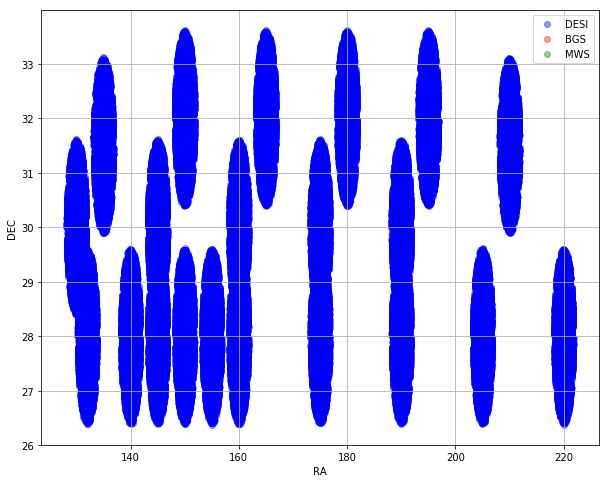

<Figure size 720x576 with 0 Axes>

In [7]:
total_func_multiple_tile(tile_LIST)

In [8]:
#DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(tile_LIST)
    
#tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)

#DESI_RA = tile[0]
#DESI_DEC = tile[1]

In [9]:
DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(tile_LIST)

len(DESI_target_2)



21

In [10]:
tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)

len(tile[5])

0

In [11]:
def plot_total_aitoff(list_of_tiles):
    
    sc_DESI = SkyCoord(tile[0], tile[1], frame='icrs', unit='deg')
    sc_BGS = SkyCoord(tile[2], tile[3], frame='icrs', unit='deg')
    sc_MWS = SkyCoord(tile[4], tile[5], frame='icrs', unit='deg')
    
    long_DESI = sc_DESI.galactic.l.wrap_at(180 * u.deg).radian
    lat_DESI = sc_DESI.galactic.b.radian

    long_BGS = sc_BGS.galactic.l.wrap_at(180 * u.deg).radian
    lat_BGS = sc_BGS.galactic.b.radian
    
    long_MWS = sc_MWS.galactic.l.wrap_at(180 * u.deg).radian
    lat_MWS = sc_MWS.galactic.b.radian
    
    plt.figure(figsize=(10,8))
    plt.subplot(111, projection="aitoff")
    plt.title("Aitoff projection")
    plt.grid(True)
    plt.scatter(long_DESI, lat_DESI, s = 5., alpha = 0.3, label = 'DESI')
    plt.scatter(long_BGS, lat_BGS, s = 5., alpha=0.3, label = 'BGS')
    plt.scatter(long_MWS, lat_MWS, s = 5., alpha = 0.3, label = 'MWS')
    plt.subplots_adjust(top=0.95,bottom=0.0)
    plt.show()

In [12]:
def reading_in_tiles(lists_of_tiles):
    
    DESI_target_2 = []
    BGS_target_2 = []
    MWS_target_2 = [] # need to have empty lists to append into 
    RA_2 = []
    DEC_2 = []
   
    
    for i in range(len(lists_of_tiles)): # for loop is iterating through the total number of files i'm wanting to use
    
        fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/Utah_Data/" + lists_of_tiles[i] +  "")
        hdul = fits_image_filename 
    
        data1 = hdul["FIBERASSIGN"].data
    
        DESI_target_1 = data1.field("DESI_TARGET") # this block is assinging the different columns for each tile list/iteration
        BGS_target_1 = data1.field("BGS_TARGET")
        MWS_target_1 = data1.field("MWS_TARGET")
        RA_1 = data1.field("TARGET_RA")
        DEC_1 = data1.field("TARGET_DEC")
        
        DESI_target_2.append(DESI_target_1)
        BGS_target_2.append(BGS_target_1)
        MWS_target_2.append(MWS_target_1) # appending the single arrays into one list of arrays
        RA_2.append(RA_1)
        DEC_2.append(DEC_1)

    
    return DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 # returns list w 20 arrays in each column


def mini_tiles_new(DESI, BGS, MWS, RA, DEC):
    
    DESI_tot = np.concatenate(DESI, axis = 0 )
    BGS_tot = np.concatenate(BGS, axis = 0 )
    MWS_tot = np.concatenate(MWS, axis = 0 )   # turning the list of arrays into a 1-D array
    RA_tot = np.concatenate(RA, axis = 0 )
    DEC_tot = np.concatenate(DEC, axis = 0 )
    
    
    DESI_tot1 = DESI_tot > 0. 
    BGS_tot1 = BGS_tot > 0.   # taking only the values in the array that is actually observed
    MWS_tot1 = MWS_tot > 0.
    DESI_BGS = (DESI_tot > 0.) & (BGS_tot > 0.) # cross matching DESI w BGS 
    DESI_MWS = (DESI_tot > 0.) & (MWS_tot > 0.) # cross matching DESI w MWS
   
    DESI_tot1_RA = (RA_tot[DESI_tot1])
    DESI_tot1_DEC = (DEC_tot[DESI_tot1]) # Calling the DEC of all the DESI values that are actually observed
    
    BGS_tot1_RA = (RA_tot[BGS_tot1])
    BGS_tot1_DEC = (DEC_tot[BGS_tot1])
    
    MWS_tot1_RA = (RA_tot[MWS_tot1])
    MWS_tot1_DEC = (DEC_tot[MWS_tot1])
    
    DESI_BGS_RA = (RA_tot[DESI_BGS])
    DESI_BGS_DEC = (DEC_tot[DESI_BGS])
    
    DESI_MWS_RA = (RA_tot[DESI_MWS])
    DESI_MWS_DEC = (DEC_tot[DESI_MWS])
    
    
    return DESI_tot1_RA, DESI_tot1_DEC,\
            BGS_tot1_RA, BGS_tot1_DEC,\
            MWS_tot1_RA, MWS_tot1_DEC,\
            DESI_BGS_RA, DESI_BGS_DEC,\
            DESI_MWS_RA, DESI_MWS_DEC,
                # ^ printing the new values

def plot_total_aitoff(list_of_tiles):
    
    sc_DESI = SkyCoord(tile[0], tile[1], frame='icrs', unit='deg')
    sc_BGS = SkyCoord(tile[2], tile[3], frame='icrs', unit='deg')
    sc_MWS = SkyCoord(tile[4], tile[5], frame='icrs', unit='deg')
    
    long_DESI = sc_DESI.galactic.l.wrap_at(180 * u.deg).radian
    lat_DESI = sc_DESI.galactic.b.radian

    long_BGS = sc_BGS.galactic.l.wrap_at(180 * u.deg).radian
    lat_BGS = sc_BGS.galactic.b.radian
    
    long_MWS = sc_MWS.galactic.l.wrap_at(180 * u.deg).radian
    lat_MWS = sc_MWS.galactic.b.radian
    
    plt.figure(figsize=(10,8))
    plt.subplot(111, projection="aitoff")
    plt.title("Aitoff projection")
    plt.grid(True)
    plt.scatter(long_DESI, lat_DESI, s = 5., alpha = 0.3, label = 'DESI')
    plt.scatter(long_BGS, lat_BGS, s = 5., alpha=0.3, label = 'BGS')
    plt.scatter(long_MWS, lat_MWS, s = 5., alpha = 0.3, label = 'MWS')
    plt.subplots_adjust(top=0.95,bottom=0.0)
    plt.show()
    

In [13]:
def total_func_aitoff(list_of_tiles): # this function reads all files, asigns components to one list for each component
                                      # and plots them all on an aitoff projection
    
    DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(list_of_tiles)
    
    tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)
    
    plot_total_aitoff(tile)

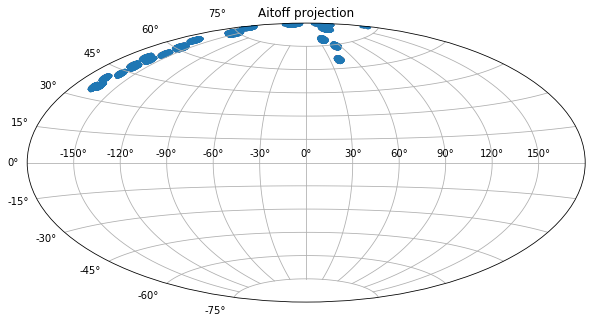

In [14]:
total_func_aitoff(tile_LIST)

In [15]:
#magnitude = 22.5 - 2.5 * np.log10(flux) 

In [16]:
 def reading_in_tiles_1(lists_of_tiles):
    
    DESI_target_2 = []
    BGS_target_2 = []
    MWS_target_2 = [] # need to have empty lists to append into 
    RA_2 = []
    DEC_2 = []
    APFLUX_G_2 = []
    APFLUX_R_2 = []
    APFLUX_Z_2 = []
    
    for i in range(len(lists_of_tiles)): # for loop is iterating through the total number of files i'm wanting to use
    
        fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/Utah_Data/" + lists_of_tiles[i] +  "")
        hdul = fits_image_filename 
    
        data1 = hdul["FIBERASSIGN"].data
    
        DESI_target_1 = data1.field("DESI_TARGET") # this block is assinging the different columns for each tile list/iteration
        BGS_target_1 = data1.field("BGS_TARGET")
        MWS_target_1 = data1.field("MWS_TARGET")
        RA_1 = data1.field("TARGET_RA")
        DEC_1 = data1.field("TARGET_DEC")
        APFLUX_G_1 = data1.field("APFLUX_G")
        APFLUX_R_1 = data1.field("APFLUX_R")
        APFLUX_Z_1 = data1.field("APFLUX_Z")
        
        DESI_target_2.append(DESI_target_1)
        BGS_target_2.append(BGS_target_1)
        MWS_target_2.append(MWS_target_1) # appending the single arrays into one list of arrays
        RA_2.append(RA_1)
        DEC_2.append(DEC_1)
        APFLUX_G_2.append(APFLUX_G_1)
        APFLUX_R_2.append(APFLUX_R_1)
        APFLUX_Z_2.append(APFLUX_Z_1)

    
    return DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2, APFLUX_G_2, APFLUX_R_2, APFLUX_Z_2 # returns list w 20 arrays in each column


def mini_tiles_new_1(DESI, BGS, MWS, RA, DEC, FLUX_G, FLUX_R, FLUX_Z):
    
    DESI_tot = np.concatenate(DESI, axis = 0 )
    BGS_tot = np.concatenate(BGS, axis = 0 )
    MWS_tot = np.concatenate(MWS, axis = 0 )   # turning the list of arrays into a 1-D array
    RA_tot = np.concatenate(RA, axis = 0 )
    DEC_tot = np.concatenate(DEC, axis = 0 )
    FLUX_G_tot = np.concatenate(FLUX_G, axis = 0)
    FLUX_R_tot = np.concatenate(FLUX_R, axis = 0)
    FLUX_Z_tot = np.concatenate(FLUX_Z, axis = 0)
    
    
    DESI_tot1 = DESI_tot > 0. 
    BGS_tot1 = BGS_tot > 0.   # taking only the values in the array that is actually observed
    MWS_tot1 = MWS_tot > 0.
    DESI_BGS = (DESI_tot > 0.) & (BGS_tot > 0.) # cross matching DESI w BGS 
    DESI_MWS = (DESI_tot > 0.) & (MWS_tot > 0.) # cross matching DESI w MWS
   
    DESI_tot1_RA = (RA_tot[DESI_tot1])
    DESI_tot1_DEC = (DEC_tot[DESI_tot1]) # Calling the DEC of all the DESI values that are actually observed
    
    BGS_tot1_RA = (RA_tot[BGS_tot1])
    BGS_tot1_DEC = (DEC_tot[BGS_tot1])
    
    MWS_tot1_RA = (RA_tot[MWS_tot1])
    MWS_tot1_DEC = (DEC_tot[MWS_tot1])
    
    DESI_BGS_RA = (RA_tot[DESI_BGS])
    DESI_BGS_DEC = (DEC_tot[DESI_BGS])
    
    DESI_MWS_RA = (RA_tot[DESI_MWS])
    DESI_MWS_DEC = (DEC_tot[DESI_MWS])
    
    
    return DESI_tot1_RA, DESI_tot1_DEC,\
            BGS_tot1_RA, BGS_tot1_DEC,\
            MWS_tot1_RA, MWS_tot1_DEC,\
            DESI_BGS_RA, DESI_BGS_DEC,\
            DESI_MWS_RA, DESI_MWS_DEC,\
            FLUX_G_tot, FLUX_R_tot, FLUX_Z_tot
                # ^ printing the new values
    
def abs_mag(flux_g, flux_r, flux_z):
    
    mag_g = 22.5 - 2.5 * np.log10(flux_g) 
    mag_r = 22.5 - 2.5 * np.log10(flux_r)
    mag_z = 22.5 - 2.5 * np.log10(flux_z)
    
    return mag_g, mag_r, mag_z

In [17]:
x = reading_in_tiles_1(tile_LIST)

In [18]:
y = mini_tiles_new_1(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7])

In [19]:
min(y[10])

-3.1717093

In [20]:
max(y[10])

81.662735

In [21]:
len(y[10])

105000

In [22]:
z = np.arange(-3.1717093, 81.662735, 2.)

Text(0.5, 0, 'Magnitude')

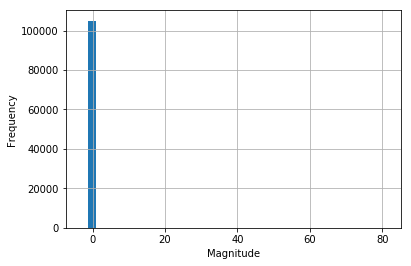

In [23]:
plt.hist(y[10], bins= z, histtype = 'bar');
plt.grid()
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

Text(0.5, 0, 'Magnitude')

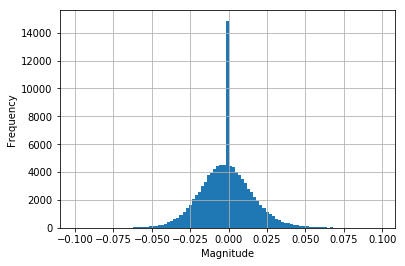

In [24]:
z1 = np.arange(-.1, .1, .002)

plt.hist(y[10], bins= z1, histtype = 'bar');
plt.grid()
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

In [73]:
def read_in_single_tile(tile_number): # reading in single tile w/ flux info
    
    fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/Utah_Data/" + tile_number +  "")
    # ^ this reads in the file from location its found in computer
    hdul = fits_image_filename
    
    data1 = hdul["FIBERASSIGN"].data
    
    DESI_target_1 = data1.field("DESI_TARGET")
    BGS_target_1 = data1.field("BGS_TARGET")
    MWS_target_1 = data1.field("MWS_TARGET") # assigning the different data to their respective columns
    RA_1 = data1.field("TARGET_RA")
    DEC_1 = data1.field("TARGET_DEC")
    APFLUX_G_1 = data1.field("FLUX_G")
    APFLUX_R_1 = data1.field("FLUX_R")
    APFLUX_Z_1 = data1.field("FLUX_Z")

    return DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1, APFLUX_G_1, APFLUX_R_1, APFLUX_Z_1

def mini_tile_new(DESI, MWS, BGS, RA, DEC, FLUX1, FLUX2, FLUX3): # creating a new tile
    
    DESI_1 = DESI > 0. 
    BGS_1 = BGS > 0. # checking to see if there are actual targets and not just place holder values
    MWS_1 = MWS > 0.
    DESI_BGS_1 = (DESI > 0.) & (BGS > 0.) # cross matching 
    DESI_MWS_1 = (DESI > 0.) & (MWS > 0.)
   
    DESI1_RA = (RA[DESI_1])
    DESI1_DEC = (DEC[DESI_1])
    DESI1_FLUX1 = (FLUX1[DESI_1]) # creating the values for DESI data
    DESI1_FLUX2 = (FLUX2[DESI_1])
    DESI1_FLUX3 = (FLUX3[DESI_1])
    
    BGS1_RA = (RA[BGS_1])
    BGS1_DEC = (DEC[BGS_1])
    
    MWS1_RA = (RA[MWS_1])
    MWS1_DEC = (DEC[MWS_1])
    
    DESI_BGS1RA = (RA[DESI_BGS_1])
    DESI_BGS1_DEC = (DEC[DESI_BGS_1])
    
    DESI_MWS1_RA = (RA[DESI_MWS_1])
    DESI_MWS1_DEC = (DEC[DESI_MWS_1])
    
    return DESI1_RA, DESI1_DEC, BGS1_RA, BGS1_DEC, MWS1_RA, MWS1_DEC, DESI_BGS1RA, DESI_BGS1_DEC,\
            DESI_MWS1_RA, DESI_MWS1_DEC, DESI1_FLUX1, DESI1_FLUX2, DESI1_FLUX3
    
def flux_measurements(flux_g, flux_r, flux_z): # flux measurements for g,r, and z bands
    
    mag_g = 22.5 - 2.5 * np.log10(flux_g) 
    mag_r = 22.5 - 2.5 * np.log10(flux_r)
    mag_z = 22.5 - 2.5 * np.log10(flux_z)
    
    return mag_g, mag_r, mag_z
    
    
def reading_and_creating_single_tile(tile_number_string): # creating function to do everything stated above
    
    read_tile = read_in_single_tile(tile_number_string)
    
    new_tile = mini_tile_new(read_tile[0], read_tile[1], read_tile[2], read_tile[3], read_tile[4],\
                             read_tile[5], read_tile[6], read_tile[7])
    
    new_tile_flux = flux_measurements(new_tile[10], new_tile[11], new_tile[12])
    
    return new_tile_flux

def plotting_flux_hist(mag, start, end, steps, title_in_string):
    
    figwidth=5
    figheight=5

    fig1=plt.figure(1,[figwidth,figheight])
    ax=fig1.gca()
    ax.grid(True)
    tile_flux = np.arange(start, end, steps)
    plt.hist(mag, bins= tile_flux, histtype = 'bar');
    plt.ylabel('Frequency')
    plt.xlabel('Magnitude')
    plt.title(title_in_string)
    plt.show()

In [74]:
def plotting_flux_hist(mag_list, start, end, steps, title_in_string_mag1,title_in_string_mag2,title_in_string_mag3):
    
    figwidth=5
    figheight=5

    fig1=plt.figure(1,[figwidth,figheight])
    ax=fig1.gca()
    ax.grid(True)
    tile_flux = np.arange(start, end, steps)
    plt.hist(mag_list[0], bins= tile_flux, histtype = 'bar');
    plt.ylabel('Frequency')
    plt.xlabel('Magnitude')
    plt.title(title_in_string_mag1)
    plt.show()
    
    fig2=plt.figure(1,[figwidth,figheight])
    ax=fig2.gca()
    ax.grid(True)
    tile_flux = np.arange(start, end, steps)
    plt.hist(mag_list[1], bins= tile_flux, histtype = 'bar');
    plt.ylabel('Frequency')
    plt.xlabel('Magnitude')
    plt.title(title_in_string_mag1)
    plt.show()

In [75]:
# make bins have enough things in it to counteract poisson fluctuations ie sqrt(N) where N is the points inside bin


tile300000 = reading_and_creating_single_tile('tile-300000.fits')
mag_g_300000 = plotting_flux_hist(tile300000[0], 24, 34, .2, 'tile-300000 G Band')

tile300001 = reading_and_creating_single_tile('tile-300001.fits')
mag_g_300001 = plotting_flux_hist(tile300001[0], 22, 35, .2, 'tile-300001 G Band')

tile300002 = reading_and_creating_single_tile('tile-300002.fits')
mag_g_300002 = plotting_flux_hist(tile300001[0], 22, 35, .2, 'tile-300002 G Band')

tile300003 = reading_and_creating_single_tile('tile-300003.fits')
mag_g_300003 = plotting_flux_hist(tile300003[0], 22, 35, .2, 'tile-300003 G Band')

tile300004 = reading_and_creating_single_tile('tile-300004.fits')
mag_g_300004 = plotting_flux_hist(tile300004[0], 22, 35, .2, 'tile-300004 G Band')

tile300005 = reading_and_creating_single_tile('tile-300005.fits')
mag_g_300005 = plotting_flux_hist(tile300005[0], 22, 35, .2, 'tile-300005 G Band')

tile300006 = reading_and_creating_single_tile('tile-300006.fits')
mag_g_300006 = plotting_flux_hist(tile300006[0], 22, 35, .2, 'tile-300006 G Band')

tile300007 = reading_and_creating_single_tile('tile-300007.fits')
mag_g_300007 = plotting_flux_hist(tile300007[0], 22, 35, .2, 'tile-300007 G Band')

tile300008 = reading_and_creating_single_tile('tile-300008.fits')
mag_g_300008 = plotting_flux_hist(tile300008[0], 22, 35, .2, 'tile-300008 G Band')

tile300009 = reading_and_creating_single_tile('tile-300009.fits')
mag_g_300009 = plotting_flux_hist(tile300009[0], 22, 35, .2, 'tile-300009 G Band')

tile300010 = reading_and_creating_single_tile('tile-300010.fits')
mag_g_300010 = plotting_flux_hist(tile300010[0], 22, 35, .2, 'tile-300010 G Band')

tile300011 = reading_and_creating_single_tile('tile-300011.fits')
mag_g_300011 = plotting_flux_hist(tile300011[0], 22, 35, .2, 'tile-300011 G Band')

tile300012 = reading_and_creating_single_tile('tile-300012.fits')
mag_g_300012 = plotting_flux_hist(tile300012[0], 22, 35, .2, 'tile-300012 G Band')

tile300013 = reading_and_creating_single_tile('tile-300013.fits')
mag_g_300013 = plotting_flux_hist(tile300013[0], 22, 35, .2, 'tile-300013 G Band')

tile300014 = reading_and_creating_single_tile('tile-300014.fits')
mag_g_300014 = plotting_flux_hist(tile300014[0], 22, 35, .2, 'tile-300014 G Band')

tile300015 = reading_and_creating_single_tile('tile-300015.fits')
mag_g_300015 = plotting_flux_hist(tile300015[0], 22, 35, .2, 'tile-300015 G Band')

tile300016 = reading_and_creating_single_tile('tile-300016.fits')
mag_g_300016 = plotting_flux_hist(tile300016[0], 22, 35, .2, 'tile-300016 G Band')

tile300017 = reading_and_creating_single_tile('tile-300017.fits')
mag_g_300017 = plotting_flux_hist(tile300017[0], 22, 35, .2, 'tile-300017 G Band')

tile300018 = reading_and_creating_single_tile('tile-300018.fits')
mag_g_300018 = plotting_flux_hist(tile300018[0], 22, 35, .2, 'tile-300018 G Band')

tile300019 = reading_and_creating_single_tile('tile-300019.fits')
mag_g_300019 = plotting_flux_hist(tile300019[0], 22, 35, .2, 'tile-300019 G Band')

tile300020 = reading_and_creating_single_tile('tile-300020.fits')
mag_g_300020 = plotting_flux_hist(tile300020[0], 22, 35, .2, 'tile-300020 G Band')

KeyError: "Key 'FLUX_G' does not exist."

/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10
/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in log10
/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log10
/Users/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in log10


Text(0.5, 1.0, 'tile-300002 Z-Band')

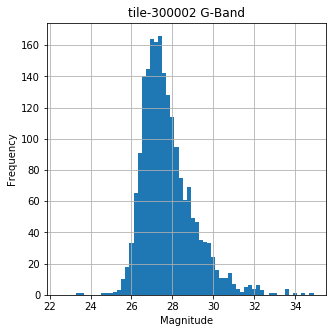

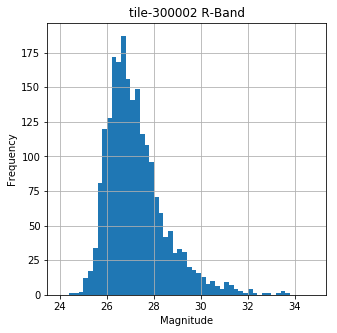

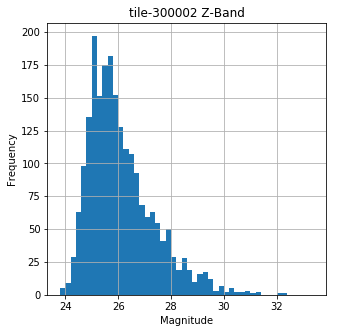

In [46]:
tile300002 = reading_and_creating_single_tile('tile-300002.fits')
figwidth=5
figheight=5

fig7=plt.figure(1,[figwidth,figheight])
ax=fig7.gca()
ax.grid(True)
g_flux_300002 = np.arange(22.5, 35, .2)
plt.hist(tile300002[0], bins= g_flux_300002, histtype = 'bar');
plt.ylabel('Frequency')
plt.xlabel('Magnitude')
plt.title("tile-300002 G-Band")


fig8=plt.figure(2,[figwidth,figheight])
ax=fig8.gca()
ax.grid(True)
r_flux_300002 = np.arange(24, 35, .2)
plt.hist(tile300002[1], bins= r_flux_300002, histtype = 'bar');
plt.ylabel('Frequency')
plt.xlabel('Magnitude')
plt.title("tile-300002 R-Band")

fig9=plt.figure(3,[figwidth,figheight])
ax=fig9.gca()
ax.grid(True)
z_flux_300002 = np.arange(23.8, 33.5, .2)
plt.hist(tile300002[2], bins= z_flux_300002, histtype = 'bar');
plt.ylabel('Frequency')
plt.xlabel('Magnitude')
plt.title("tile-300002 Z-Band")